In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [103]:
df = pd.read_csv('iris.data')

In [104]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [105]:
columns = ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class']

In [106]:
df.columns =columns

In [107]:
df

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
df.describe()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal length(cm)  149 non-null    float64
 1   sepal width(cm)   149 non-null    float64
 2   petal length(cm)  149 non-null    float64
 3   petal width(cm)   149 non-null    float64
 4   class             149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [110]:
df.isna().sum()

sepal length(cm)    0
sepal width(cm)     0
petal length(cm)    0
petal width(cm)     0
class               0
dtype: int64

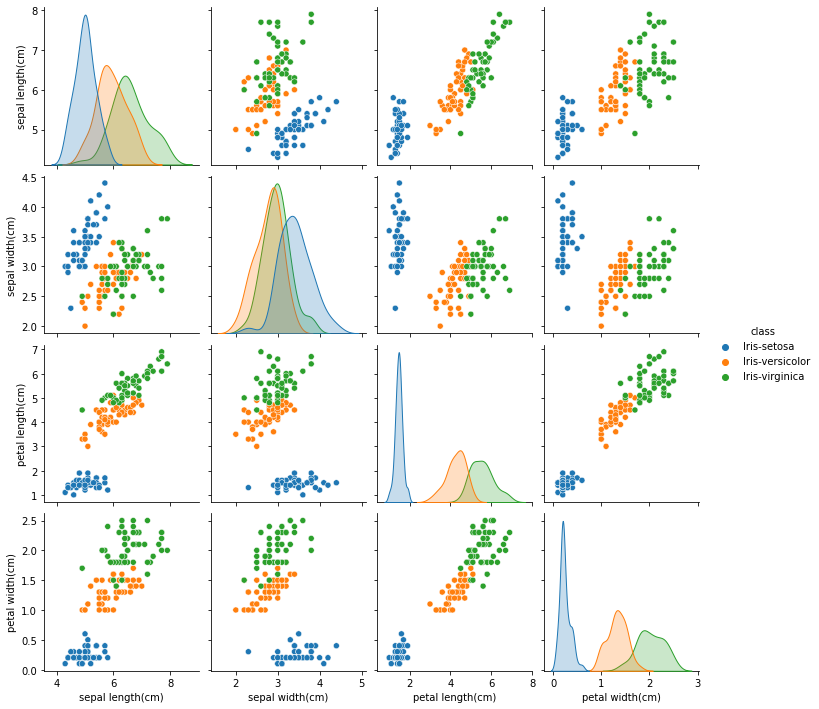

In [111]:
sns.pairplot(df, hue='class')

In [112]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [113]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

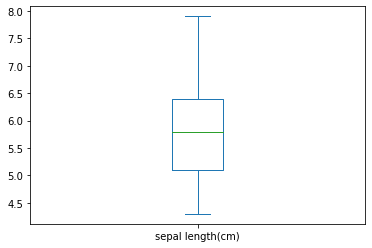

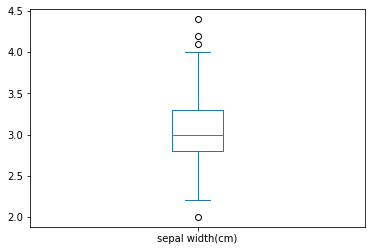

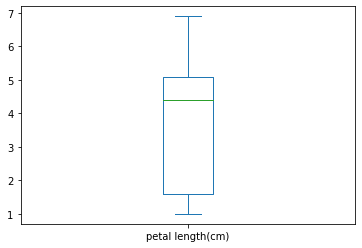

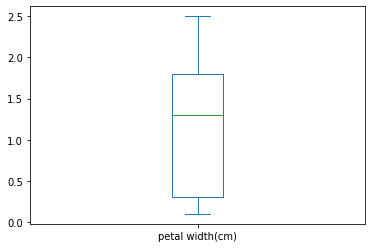

In [114]:
#outliers in sepal width
for i in df.columns:
    if i != 'class':
        df[i].plot.box()
        plt.show()

<AxesSubplot:ylabel='Frequency'>

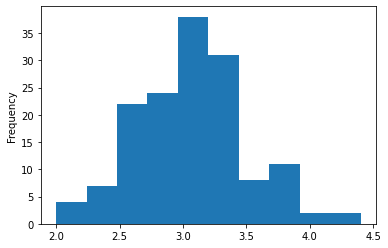

In [115]:
#Since there are 4 outliers we can easly drop those samples.
df['sepal width(cm)'].plot.hist()

In [116]:
per_5th = np.percentile(df['sepal width(cm)'],5)
per_95th = np.percentile(df['sepal width(cm)'],95)

In [117]:
print(per_5th)
per_95th

2.34


3.8

In [118]:
outliers = [ i for i in df['sepal width(cm)'] if i < per_5th or i > per_95th]

In [119]:
outliers

[3.9, 4.0, 4.4, 3.9, 4.1, 4.2, 2.3, 2.3, 2.0, 2.2, 2.2, 2.3, 2.3, 2.2]

In [120]:
df[(df['sepal width(cm)']<per_5th) | (df['sepal width(cm)']>per_95th)]

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
4,5.4,3.9,1.7,0.4,Iris-setosa
13,5.8,4.0,1.2,0.2,Iris-setosa
14,5.7,4.4,1.5,0.4,Iris-setosa
15,5.4,3.9,1.3,0.4,Iris-setosa
31,5.2,4.1,1.5,0.1,Iris-setosa
32,5.5,4.2,1.4,0.2,Iris-setosa
40,4.5,2.3,1.3,0.3,Iris-setosa
52,5.5,2.3,4.0,1.3,Iris-versicolor
59,5.0,2.0,3.5,1.0,Iris-versicolor
61,6.0,2.2,4.0,1.0,Iris-versicolor


In [121]:
df = df.drop(df[(df['sepal width(cm)']<per_5th) | (df['sepal width(cm)']>per_95th)].index)

<AxesSubplot:>

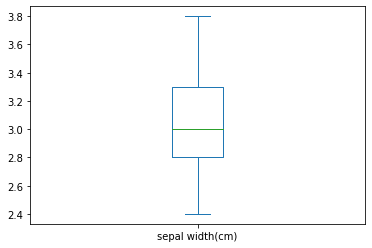

In [122]:
df['sepal width(cm)'].plot.box()

In [123]:
y = df.pop('class')
x = df

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler().fit(x)
x_t = scaler.transform(x)

In [126]:
from sklearn.preprocessing import OneHotEncoder


In [127]:
onehot_encoder = OneHotEncoder(sparse=False)
y_hot = onehot_encoder.fit_transform(y.to_numpy().reshape(-1,1))

In [128]:
from sklearn.linear_model import LogisticRegression
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test = train_test_split(x_t,y, random_state=66,test_size=0.33)

In [132]:
lr = LogisticRegression(random_state=66).fit(x_train,y_train)

In [139]:
np.sum(lr.predict(x_test) != y_test)

1

In [144]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
np.sum(clf.predict(x_test) != y_test)

1

In [145]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
np.sum(clf.predict(x_test) != y_test)

1